In [213]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

In [2]:
df = pd.read_csv("./movieReplicationSet.csv")

In [3]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [6]:
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [181]:
# Question 1
# Define a function that split the dataset into two groups

In [113]:
# Question 2
def get_movie_year_pair(movies):
    movie_year_pair = []
    for movie in df.columns[:400]:
        res = re.match(".*?\((\d{4})\)", movie)
        movie_year_pair.append((movie,int(res.group(1))))
    return list(map(lambda x: x[0],sorted(movie_year_pair, key=lambda x: x[1])))

        
def split_time_wise(df):
    # 1. Extract the timestamp
    movies = df.columns[:400]
    movie_sorted_by_year = get_movie_year_pair(movies)
    length = len(movie_sorted_by_year)
    
    # 2. Split the dataset by release date
    statistics = dict(df[df.columns[:400]].mean(axis = 0))
    older_group_statistics = [statistics[movie] for movie in movie_sorted_by_year[:length // 2]]
    newer_group_statistics = [statistics[movie] for movie in movie_sorted_by_year[length // 2:]]
    
    variance_group_old = np.array(older_group_statistics).var()
    variance_group_new = np.array(newer_group_statistics).var()
    print(variance_group_old, variance_group_new)
    return [older_group_statistics,newer_group_statistics]


def perform_t_test(df):
    [older_group, newer_group] = split_time_wise(df)
    t1,p1 = stats.ttest_ind(older_group, newer_group)
    print(t1,p1)
    
get_movie_year_pair(df.columns[:400])[399]
# perform_t_test(df)

'Captain America: Civil War (2016)'

In [158]:
# Question 3


In [211]:
# Question 4
# Helper function for question 4,6,8
def t_test_for_movie(movie, attribute, split):
    group_1 = movie[movie[attribute] == split[0]].dropna(axis=0)
    group_2 = movie[movie[attribute] == split[1]].dropna(axis=0)
    
    
    group_1_stats = list(group_1.iloc[:,0])
    group_2_stats = list(group_2.iloc[:,0])
    
    group_1_var = group_1.iloc[:,0].var()
    group_2_var = group_2.iloc[:,0].var()

    t, p = stats.ttest_ind(group_1_stats, group_2_stats)
    return t, p
    
def calculate_proportion(df, attribute, split):
    
    count = 0
    for movie in df.columns[:400]:
        t, p = t_test_for_movie(df[[movie, attribute]], attribute, split)
        if p < 0.005:
            count += 1
    
    return count / 400
    

calculate_proportion(df,"Gender identity (1 = female; 2 = male; 3 = self-described)", [1,2])

0.115

(array([1., 0., 3., 0., 0., 2., 0., 1., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

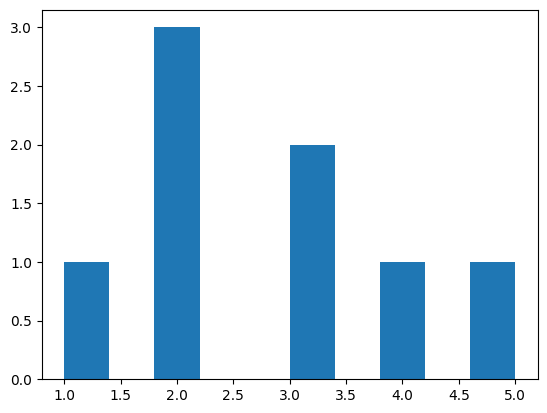

In [209]:
# Question 5

In [178]:
# Question 6
calculate_proportion(df,"Are you an only child? (1: Yes; 0: No; -1: Did not respond)", [1,0])

0.025

In [180]:
# Question 7

In [179]:
# Question 8
calculate_proportion(df,"Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)", [0,1])

0.015

In [215]:
# Question 9
def perform_ks_test(data_1,data_2):
    
    ks, p = ks_2samp(data_1,data_2)
    return ks, p
    
    
def compare_distribution(df):
    group_1 = df['Home Alone (1990)'].dropna()
    group_2 = df['Finding Nemo (2003)'].dropna()
    
    ks, p = perform_ks_test(group_1, group_2)
        
    print(ks, p)

compare_distribution(df)  

0.15269080020897632 6.379397182836346e-10


In [208]:
# Question 10
def franchise_anova(df, franchise):
    movies = df.columns[df.columns.str.contains(franchise)]
    groups = [df[movie].dropna() for movie in movies]
    
    f, p = stats.f_oneway(*groups)
    
    return f,p
    
def compute_inconsistency(df, franchise_list):
    count = 0
    for franchise in franchise_list:
        f, p = franchise_anova(df, franchise)
        print(franchise, f,p)
        if p < 0.005:
            count += 1
    print(count)
    return count / len(franchise_list)
    
franchise_list = ['Star Wars','Harry Potter','The Matrix','Indiana Jones','Jurassic Park','Pirates of the Caribbean','Toy Story','Batman']
compute_inconsistency(df, franchise_list)

Star Wars 45.645133146545426 1.5252665421920376e-45
Harry Potter 0.7729869142003183 0.5089850679527992
The Matrix 25.07705929547676 2.1374604702645577e-11
Indiana Jones 14.566513091640147 2.2613291345737005e-09
Jurassic Park 22.716093347500227 1.8386566379299737e-10
Pirates of the Caribbean 9.672049744576752 6.582065023243828e-05
Toy Story 7.6709305226197095 0.0004763856415114884
Batman 108.26045119136043 1.538339512760035e-44
7


0.875

In [193]:
# Extra Credit


TypeError: unsupported operand type(s) for |: 'NoneType' and 'NoneType'

In [204]:
7/8

0.875